In [1]:
import cv2
import numpy as np
#import scipy as sp
import matplotlib.pyplot as plt


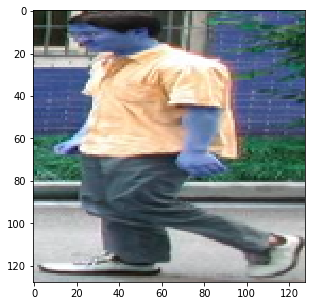

(128, 128, 3)


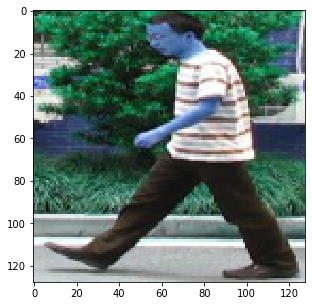

(128, 128, 3)


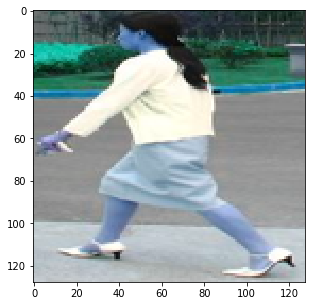

(128, 128, 3)


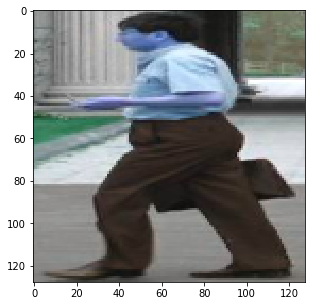

(128, 128, 3)


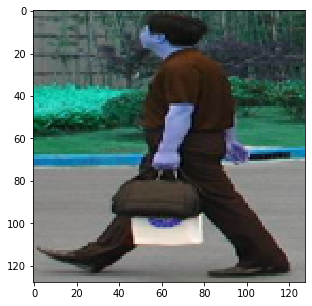

(128, 128, 3)


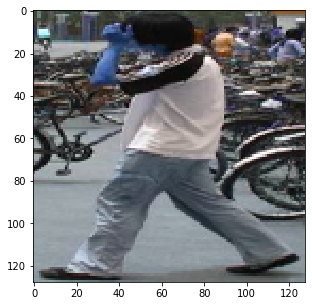

(128, 128, 3)


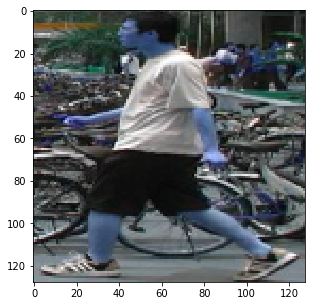

(128, 128, 3)


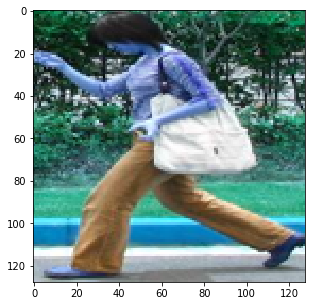

(128, 128, 3)


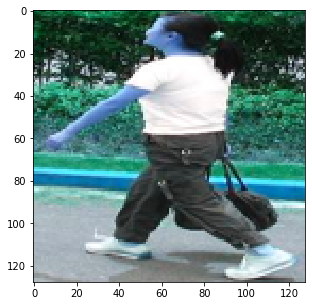

(128, 128, 3)


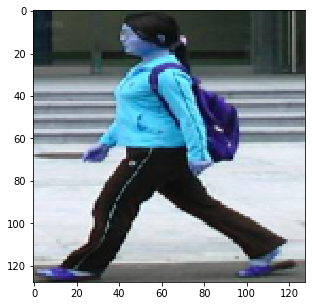

(128, 128, 3)


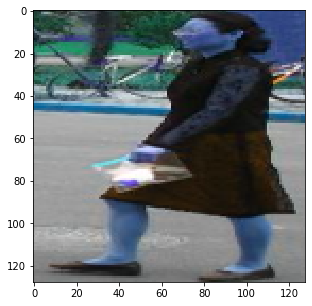

(128, 128, 3)


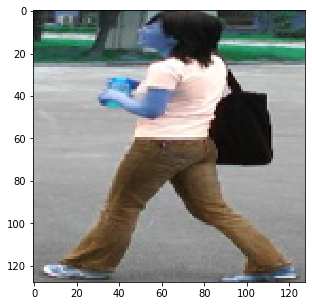

(128, 128, 3)


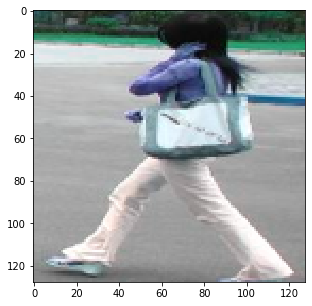

(128, 128, 3)


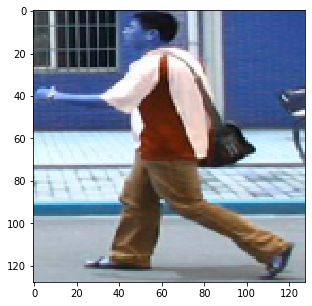

(128, 128, 3)


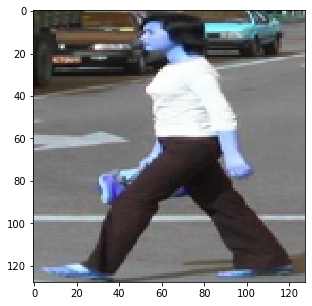

(128, 128, 3)


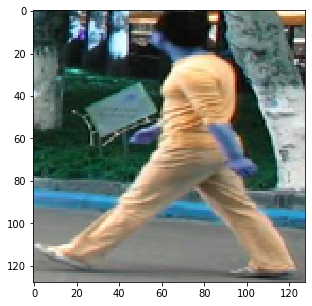

(128, 128, 3)


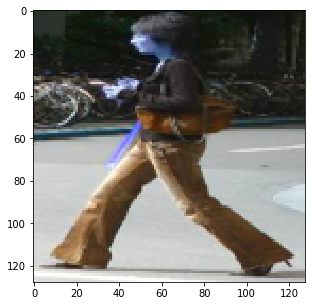

(128, 128, 3)


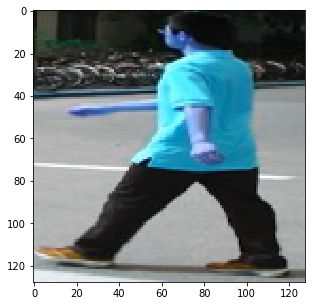

(128, 128, 3)


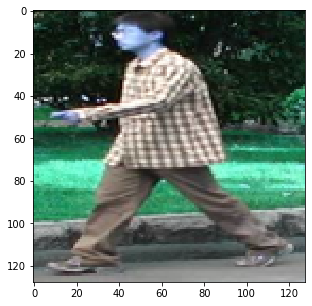

(128, 128, 3)


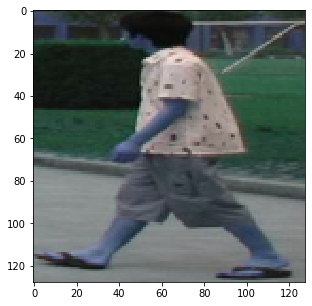

(128, 128, 3)


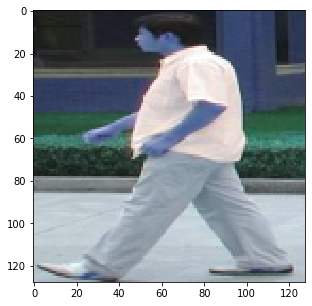

(128, 128, 3)


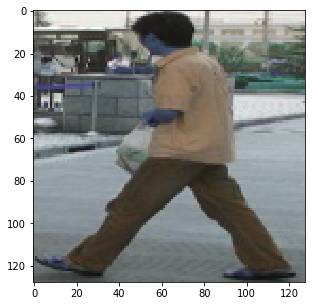

(128, 128, 3)


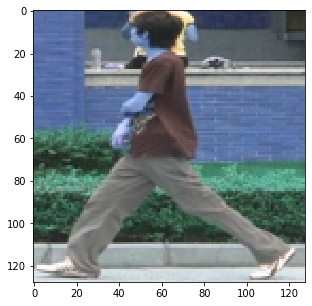

(128, 128, 3)


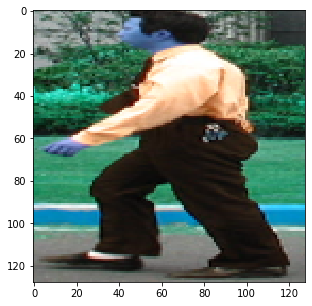

(128, 128, 3)


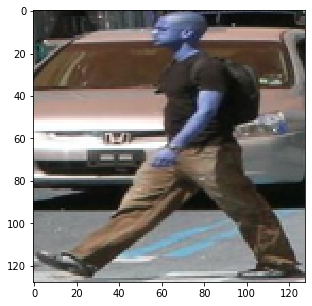

(128, 128, 3)


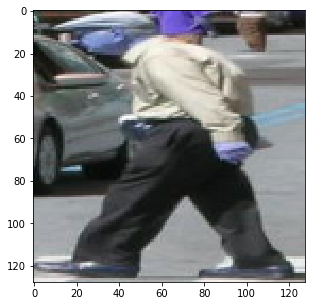

(128, 128, 3)


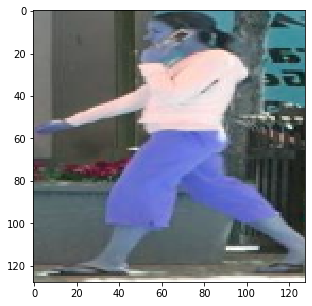

(128, 128, 3)


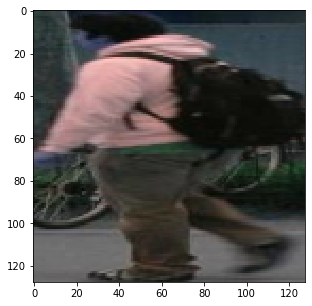

(128, 128, 3)


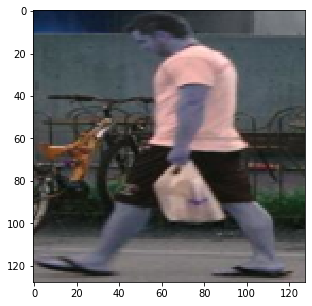

(128, 128, 3)


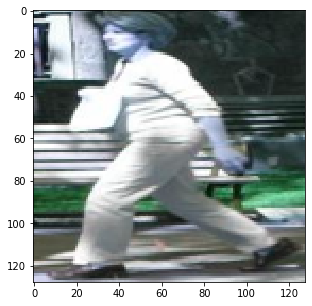

(128, 128, 3)


In [2]:
#Training
#1.Resize the training image
# Resize the training images to 128 × 128.
people = []
for num in range(1,31):
    people.append("p{number}.png".format(number=num))

resized_imgs = []
for img in people:
    img1 = cv2.imread(img)
    #h,w = img1.shape[0:2]
    #h_factor = 128/h
    #w_factor = 128/w
    #resized_imgs.append(cv2.resize(img1, None, fx=w_factor, fy=h_factor, interpolation=cv2.INTER_LINEAR))
    resized_imgs.append(cv2.resize(img1,(128,128)))
for i in range(30): 
    plt.figure(figsize=(5,5))
    plt.imshow(resized_imgs[i])
    plt.show()
    print(resized_imgs[i].shape)






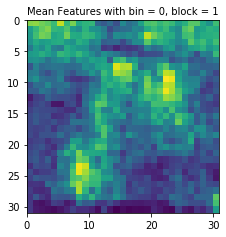

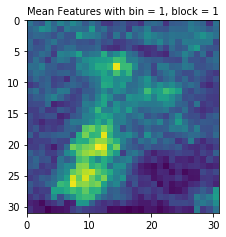

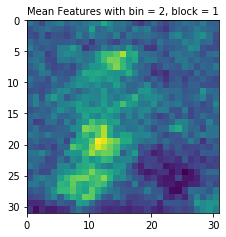

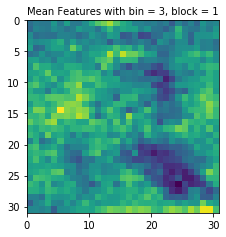

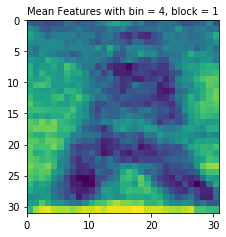

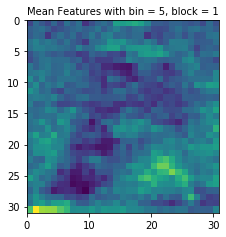

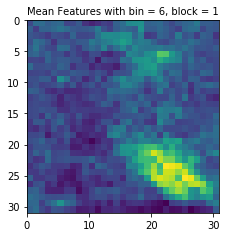

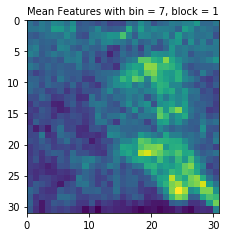

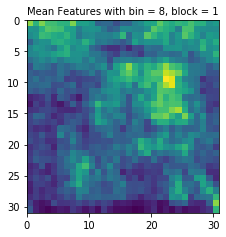

In [3]:
#2. Compute HoG features using cell size of 4*4 pixels, block size of2*2 cells and 9 orientation bins 
def hog_f(imgs):
    
    cell_size = (4, 4)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 9  # number of orientation bins
    
    the_HoG_features = []
    for img in imgs:
   
        hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                          img.shape[0] // cell_size[0] * cell_size[0]),
                                _blockSize=(block_size[1] * cell_size[1],
                                            block_size[0] * cell_size[0]),
                                _blockStride=(cell_size[1], cell_size[0]),
                                _cellSize=(cell_size[1], cell_size[0]),
                                _nbins=nbins)

        n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
        
        

        
        hog_feats = hog.compute(img) \
                       .reshape(n_cells[1] - block_size[1] + 1,
                                n_cells[0] - block_size[0] + 1,
                                block_size[1], block_size[0], nbins) \
                       .transpose((1, 0, 3, 2, 4))  # index blocks by rows first
        
        the_HoG_features.append(hog_feats)
        
    return the_HoG_features


hog_features = hog_f(resized_imgs)

# 3.Calculate and store the mean feature map across training images

feature_mean = sum(hog_features) / len(hog_features)

#print(feature_mean)

#4.Display 9 orientation channels of the mean feature maps for the first block.
for i in range(9):
    plt.figure(figsize = (20,20))
    
    plt.subplot(151)
    plt.pcolor(feature_mean[:, :, 0,0,i]) 
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("Mean Features with bin = {}, block = 1".format(i),fontsize=10)

    

In [10]:
#Testing
#2. Resize windows to 128*128 and Compute HoG features similar to what was done during training.
img_t = cv2.imread("test_image.png")   #gray scale

img_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2RGB)
def obj_detect(image):
    stride=16
    winsize=[256,406]
    # slide a window across the image
    for i in range(0, image.shape[0], stride):
        for j in range(0, image.shape[1], stride):
            yield image[i:i + winsize[1], j:j + winsize[0]]
            
overlapping_windows = obj_detect(img_t)

resized_windows = []
for i in overlapping_windows:
    resized_window=cv2.resize(i,(128,128))
    resized_windows.append(resized_window)
    
hog_windows = hog_f(resized_windows)

There are 72 matches after detection


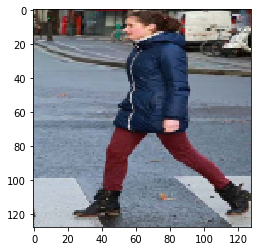

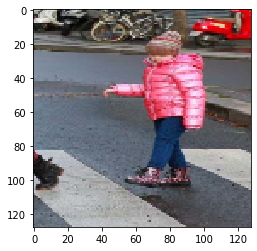

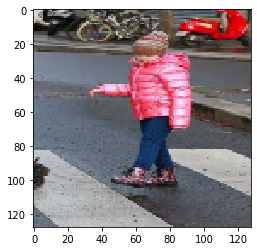

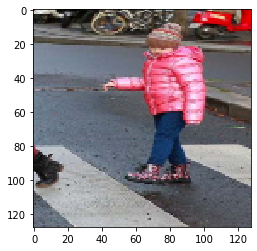

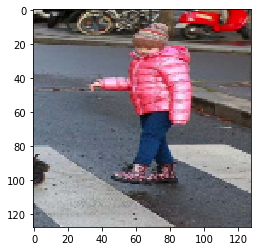

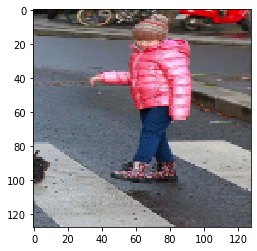

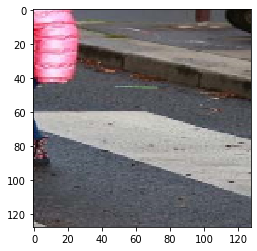

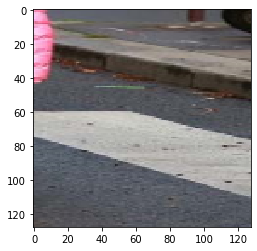

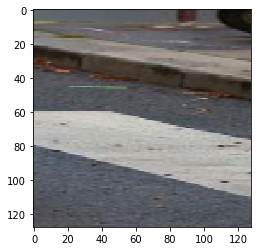

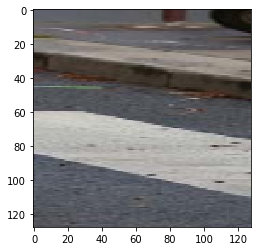

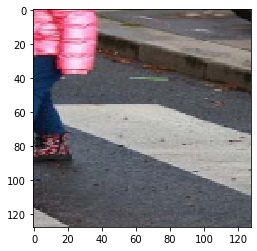

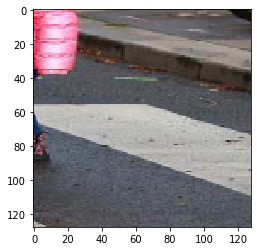

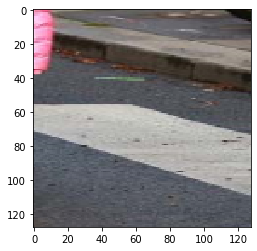

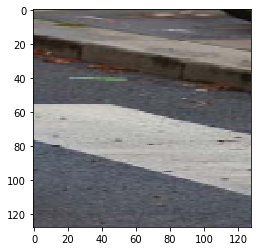

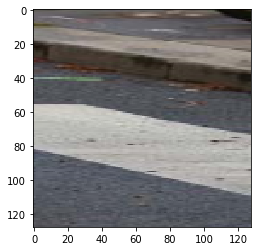

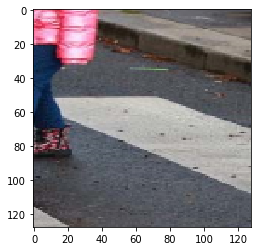

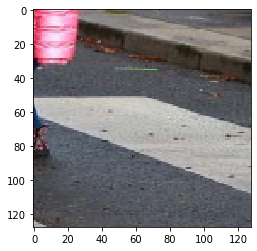

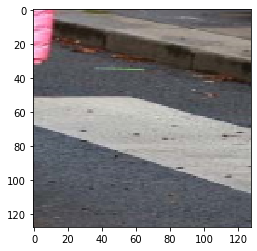

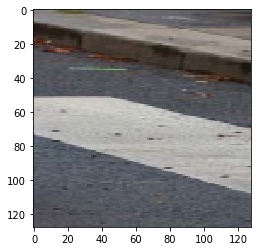

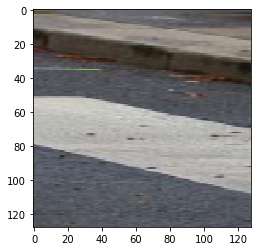

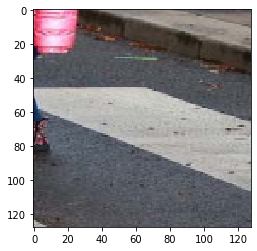

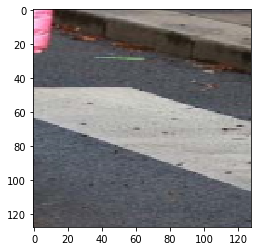

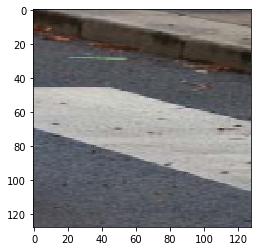

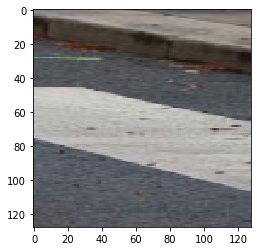

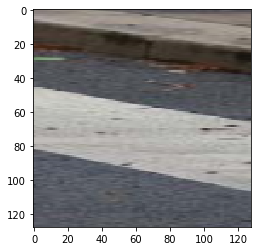

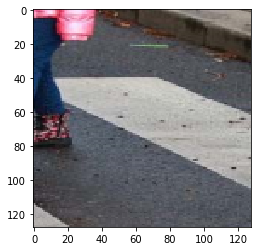

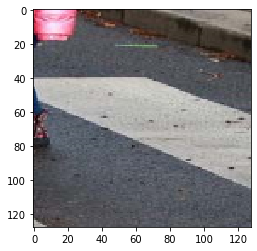

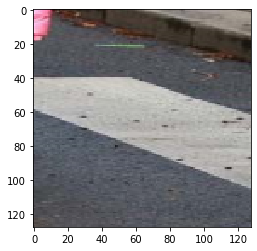

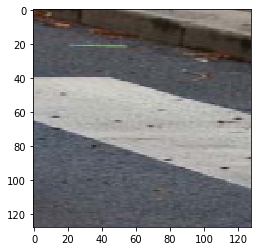

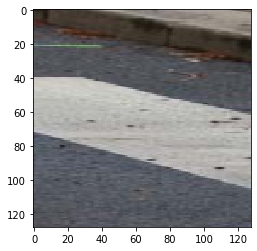

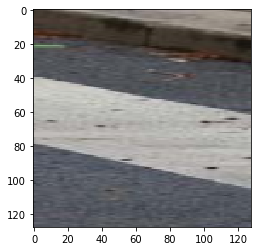

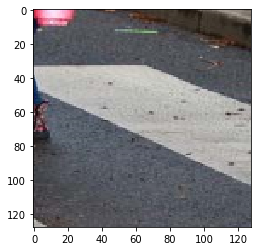

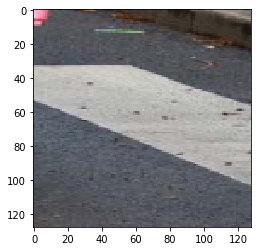

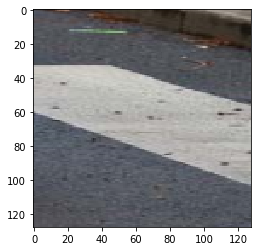

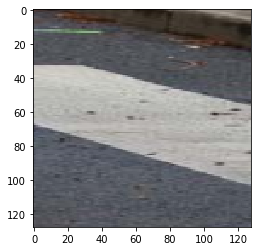

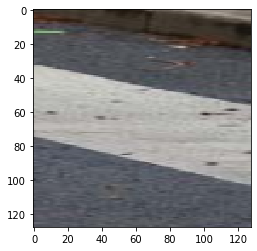

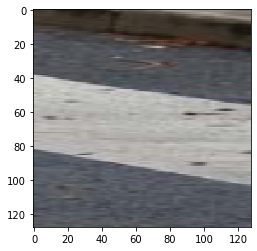

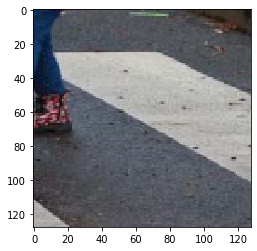

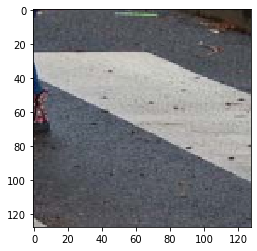

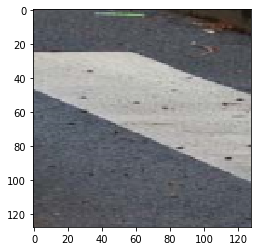

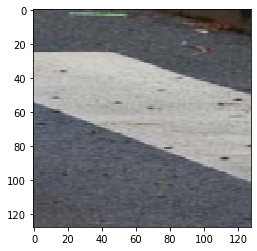

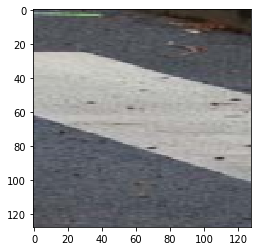

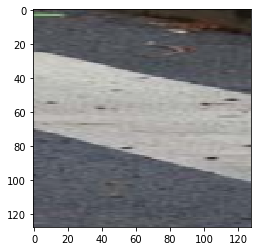

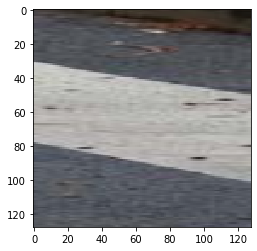

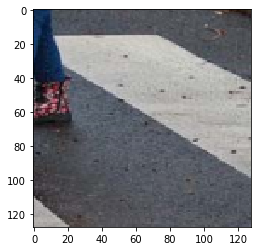

In [11]:
#3. Compute the Euclidean distance between the feature map of each window and the mean feature map of training images. (2 points)
distances = []

for window in hog_windows:
    euc_distance=cv2.norm(window,feature_mean, normType=cv2.NORM_L2, mask=None)
    distances.append(euc_distance)
    
#4. Threshold the Euclidean distances to detect pedestrians in the test image. Display the detected window. Experiment with threshold values in order to achieve good performance.
threshold=18.5
pedestrains = []

for index, value in enumerate(distances):
    if value<threshold:
        pedestrains.append(index)
print("There are {index} matches after detection".format(index=len(pedestrains)))
for index, indice in enumerate(pedestrains):
    if index == 45:
        break
    plt.imshow(resized_windows[indice])
    plt.show()



In [ ]:
#5 Discuss the performance of above method. Did you detect all four pedestrians in the test image? Suggest methods to improve results.

